# Tìm mối quan hệ giữa các yếu tố sức khỏe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../data/processed/processed_heart_disease.csv')

### Phân bổ nam nữ theo độ tuổi

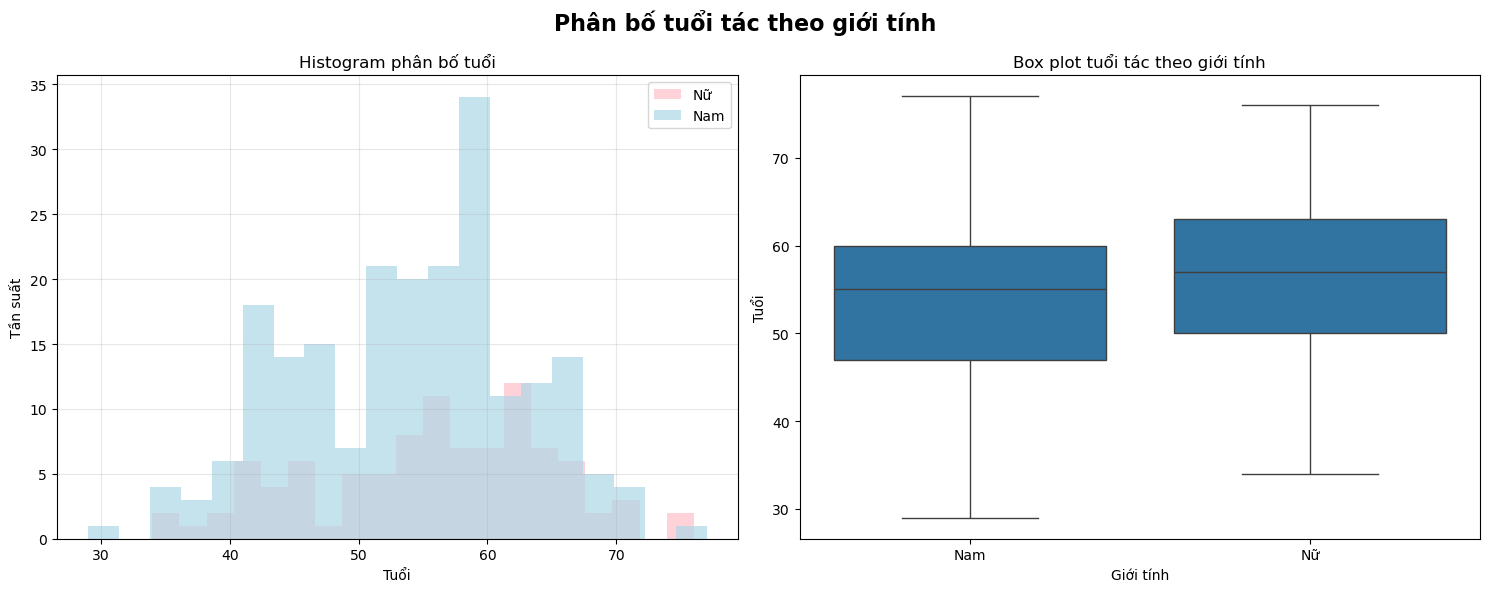

Số lượng nam giới: 211
Số lượng nữ giới: 97
Tuổi trung bình nam: 53.9
Tuổi trung bình nữ: 55.7
Độ lệch chuẩn nam: 8.8
Độ lệch chuẩn nữ: 9.4


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Phân bố tuổi tác theo giới tính', fontsize=16, fontweight='bold')

# 1. Histogram 
axes[0].hist(df[df['sex'] == 0]['age'], alpha=0.7, label='Nữ', bins=20, color='pink')
axes[0].hist(df[df['sex'] == 1]['age'], alpha=0.7, label='Nam', bins=20, color='lightblue')
axes[0].set_xlabel('Tuổi')
axes[0].set_ylabel('Tần suất')
axes[0].set_title('Histogram phân bố tuổi')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Box plot
df_plot = df.copy()
df_plot['gender'] = df_plot['sex'].map({0: 'Nữ', 1: 'Nam'})
sns.boxplot(data=df_plot, x='gender', y='age', ax=axes[1])
axes[1].set_title('Box plot tuổi tác theo giới tính')
axes[1].set_xlabel('Giới tính')
axes[1].set_ylabel('Tuổi')

plt.tight_layout()
plt.show()

male_ages = df[df['sex'] == 1]['age']
female_ages = df[df['sex'] == 0]['age']

print(f"Số lượng nam giới: {len(male_ages)}")
print(f"Số lượng nữ giới: {len(female_ages)}")
print(f"Tuổi trung bình nam: {male_ages.mean():.1f}")
print(f"Tuổi trung bình nữ: {female_ages.mean():.1f}")
print(f"Độ lệch chuẩn nam: {male_ages.std():.1f}")
print(f"Độ lệch chuẩn nữ: {female_ages.std():.1f}")


## Phân tích mối quan hệ giữa Cholesterol và bệnh tim

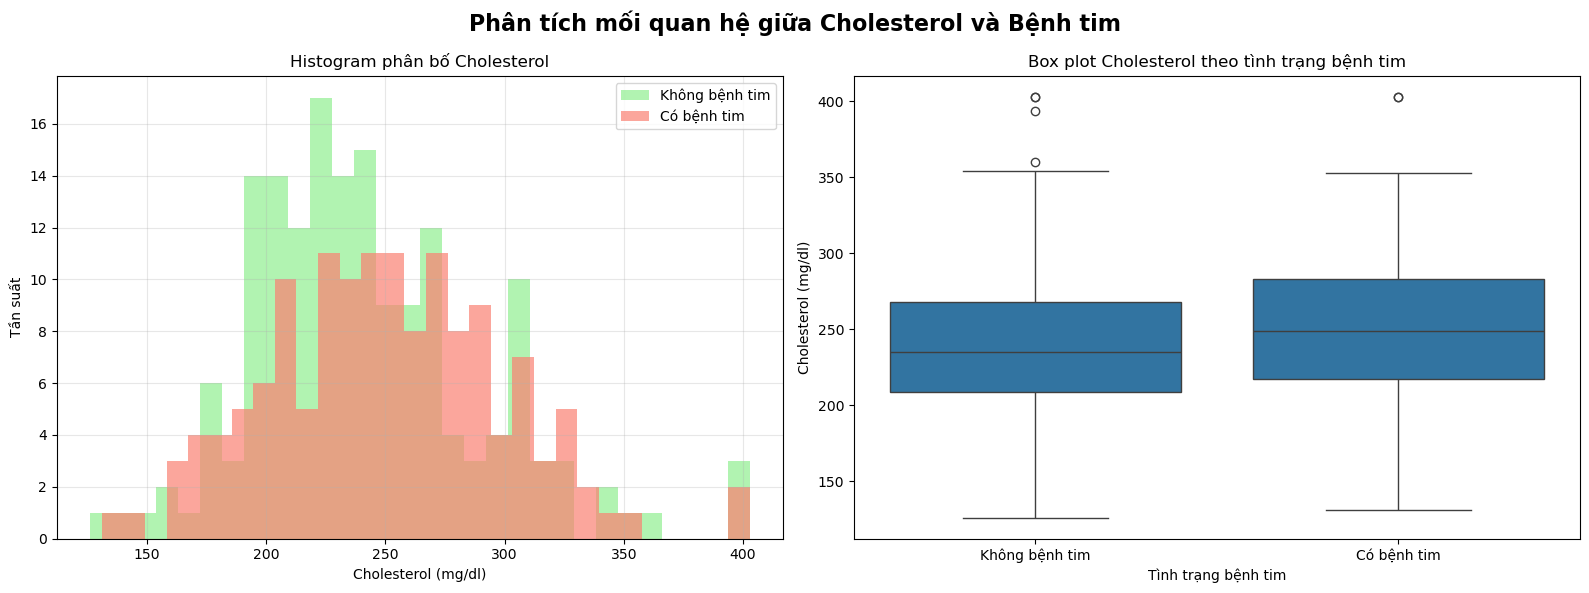

In [35]:
# Phân tích mối quan hệ giữa Cholesterol và bệnh tim
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Phân tích mối quan hệ giữa Cholesterol và Bệnh tim', fontsize=16, fontweight='bold')

# 1. Histogram phân bố Cholesterol theo nhóm bệnh tim
axes[0].hist(df[df['num'] == 0]['chol'], alpha=0.7, label='Không bệnh tim', bins=30, color='lightgreen')
axes[0].hist(df[df['num'] == 1]['chol'], alpha=0.7, label='Có bệnh tim', bins=30, color='salmon')
axes[0].set_xlabel('Cholesterol (mg/dl)')
axes[0].set_ylabel('Tần suất')
axes[0].set_title('Histogram phân bố Cholesterol')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Box plot Cholesterol theo bệnh tim
df_plot = df.copy()
df_plot['heart_disease'] = df_plot['num'].map({0: 'Không bệnh tim', 1: 'Có bệnh tim'})
sns.boxplot(data=df_plot, x='heart_disease', y='chol', ax=axes[1])
axes[1].set_title('Box plot Cholesterol theo tình trạng bệnh tim')
axes[1].set_xlabel('Tình trạng bệnh tim')
axes[1].set_ylabel('Cholesterol (mg/dl)')

plt.tight_layout()
plt.show()


## Phân tích mối quan hệ giữa Huyết áp khi nghỉ (trestbps) và bệnh tim

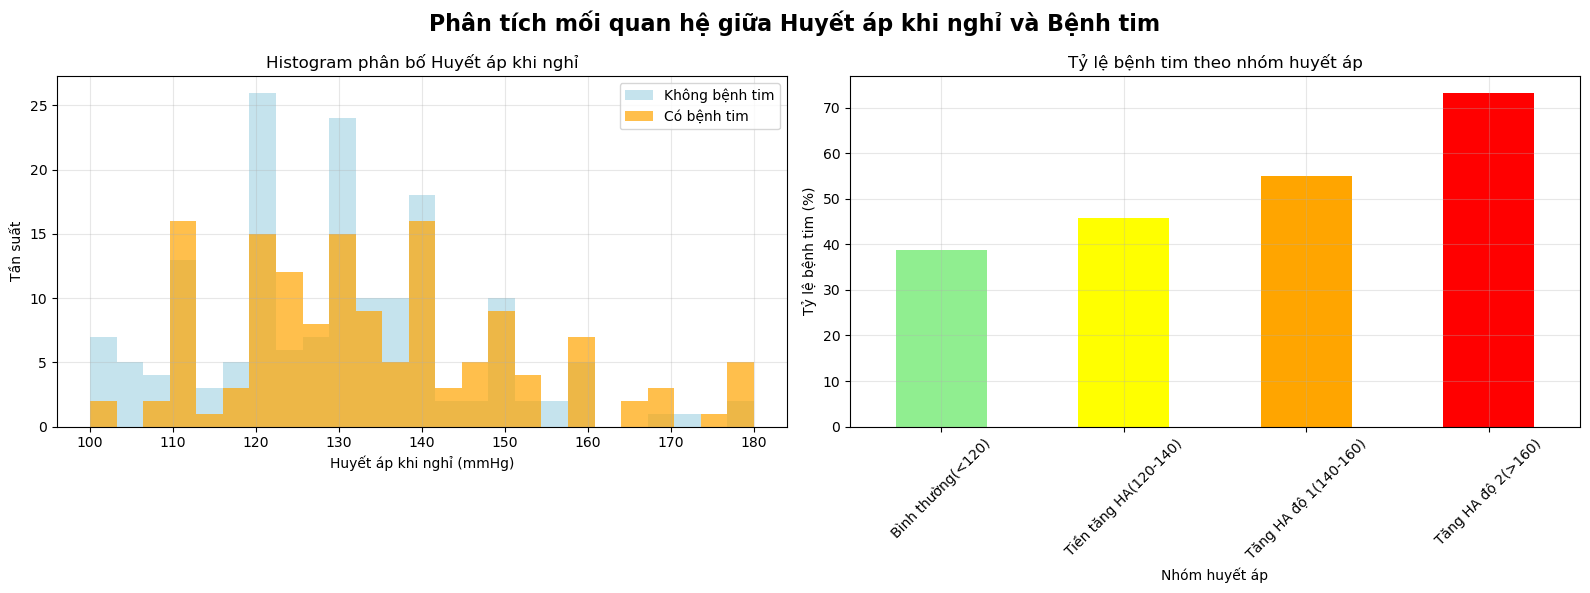

In [ ]:
# Phân tích mối quan hệ giữa Huyết áp khi nghỉ (trestbps) và bệnh tim
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Phân tích mối quan hệ giữa Huyết áp khi nghỉ và Bệnh tim', fontsize=16, fontweight='bold')

# 1. Histogram phân bố Huyết áp theo nhóm bệnh tim
axes[0].hist(df[df['num'] == 0]['trestbps'], alpha=0.7, label='Không bệnh tim', bins=25, color='lightblue')
axes[0].hist(df[df['num'] == 1]['trestbps'], alpha=0.7, label='Có bệnh tim', bins=25, color='orange')
axes[0].set_xlabel('Huyết áp khi nghỉ (mmHg)')
axes[0].set_ylabel('Tần suất')
axes[0].set_title('Histogram phân bố Huyết áp khi nghỉ')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Phân tích theo nhóm mức huyết áp
# Chia huyết áp thành các nhóm theo tiêu chuẩn y học
df['bp_category'] = pd.cut(df['trestbps'], 
                          bins=[0, 120, 140, 160, 999], 
                          labels=['Bình thường(<120)', 'Tiền tăng HA(120-140)', 
                                 'Tăng HA độ 1(140-160)', 'Tăng HA độ 2(>160)'])

bp_analysis = df.groupby('bp_category')['num'].agg(['count', 'sum', 'mean']).round(3)
bp_analysis.columns = ['Tổng số', 'Số ca bệnh tim', 'Tỷ lệ bệnh tim']
bp_analysis['Tỷ lệ bệnh tim (%)'] = (bp_analysis['Tỷ lệ bệnh tim'] * 100).round(1)

# 2. Biểu đồ cột tỷ lệ bệnh tim theo nhóm huyết áp
bp_analysis['Tỷ lệ bệnh tim (%)'].plot(kind='bar', ax=axes[1], color=['lightgreen', 'yellow', 'orange', 'red'])
axes[1].set_title('Tỷ lệ bệnh tim theo nhóm huyết áp')
axes[1].set_xlabel('Nhóm huyết áp')
axes[1].set_ylabel('Tỷ lệ bệnh tim (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()